In this project we try to predict the price of `house`

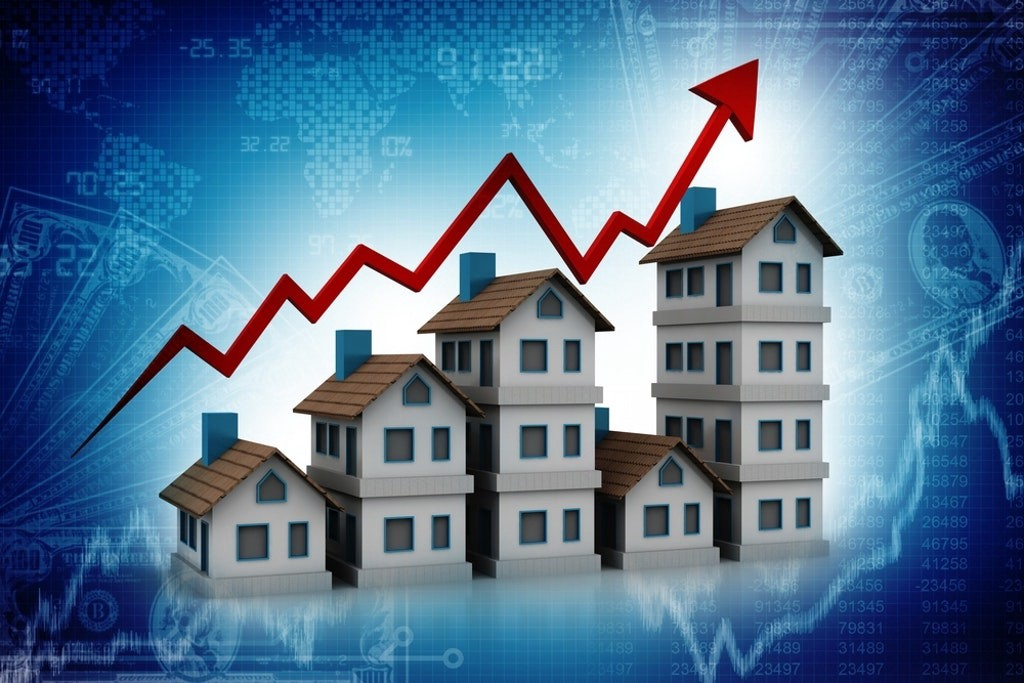

importing libraries we will use 

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.shape

(21613, 21)

we have `21613` records and `21` columns

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

* There is not a missing values
* there is 20 num and 1 cat columns

## Univariate analysis

In [8]:
df["id"].nunique()  # some id repeted 

21436

we will create a variable which will show the age of house

In [9]:
df["house_yr"]=pd.to_datetime('today').year-df["yr_built"]


In [10]:
df.drop(columns=["date"], inplace=True)

In [11]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_yr
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,67
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,71
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,89
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,57
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,13
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,8
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,13
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,18


* we drop date columns becz we see the house price in 2022
* create new column (how old is the house)

------------------------------------------------------------------------------------=

In [12]:
def univariate_num(data, x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min() , 2)
    max1=round(data[x].max() , 2)
    mean=round(data[x].mean() , 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(), 2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75),2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    my_value={"missing": missing, "min": min1, "max": max1, "mean":mean, "var": var, "std":std,
             "range":range1, "q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=df, y=data[x])
    plt.show
    return my_value

In [13]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
house_yr           int64
dtype: object

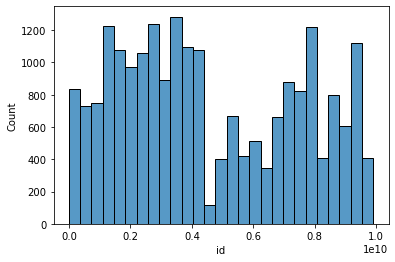

{'missing': 0,
 'min': 1000102,
 'max': 9900000190,
 'mean': 4580301520.86,
 'var': 8.274629486057814e+18,
 'std': 2876565571.31,
 'range': 9899000088,
 'q1': 2123049194.0,
 'q2': 3904930410.0,
 'q3': 7308900445.0,
 'skewness': 0.24,
 'kurtosis': -1.26}

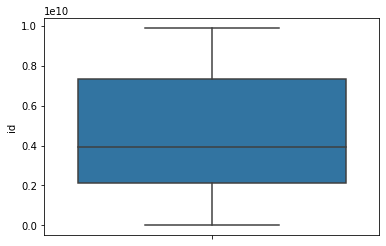

In [14]:
univariate_num(data=df, x="id")

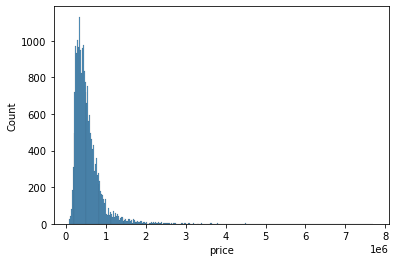

{'missing': 0,
 'min': 75000.0,
 'max': 7700000.0,
 'mean': 540088.14,
 'var': 134782378397.25,
 'std': 367127.2,
 'range': 7625000.0,
 'q1': 321950.0,
 'q2': 450000.0,
 'q3': 645000.0,
 'skewness': 4.02,
 'kurtosis': 34.59}

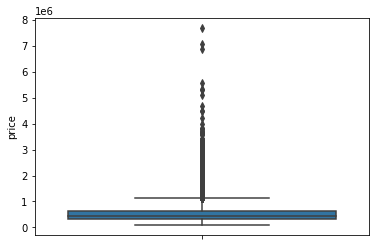

In [15]:
univariate_num(data=df, x="price")

Price
* no missing values
* minimum house price is 75000 and max is 7700000
* avg house price is  540088.14
* Outliers in price (column)

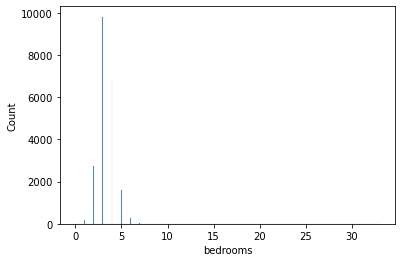

{'missing': 0,
 'min': 0,
 'max': 33,
 'mean': 3.37,
 'var': 0.87,
 'std': 0.93,
 'range': 33,
 'q1': 3.0,
 'q2': 3.0,
 'q3': 4.0,
 'skewness': 1.97,
 'kurtosis': 49.06}

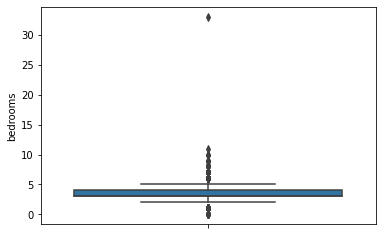

In [16]:
univariate_num(data=df, x="bedrooms")

* in bedroom column up and down both side outliers

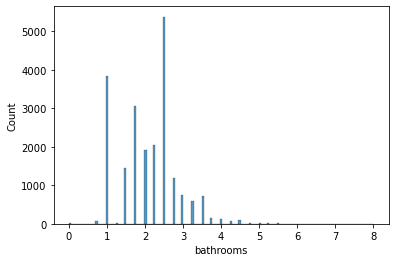

{'missing': 0,
 'min': 0.0,
 'max': 8.0,
 'mean': 2.11,
 'var': 0.59,
 'std': 0.77,
 'range': 8.0,
 'q1': 1.75,
 'q2': 2.25,
 'q3': 2.5,
 'skewness': 0.51,
 'kurtosis': 1.28}

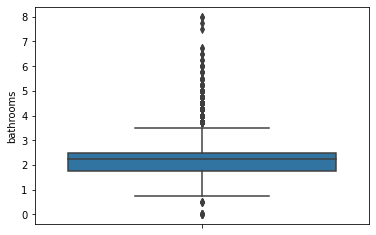

In [17]:
univariate_num(data=df, x="bathrooms")

* outliers in bathrooms column

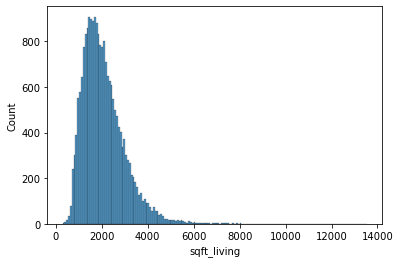

{'missing': 0,
 'min': 290,
 'max': 13540,
 'mean': 2079.9,
 'var': 843533.68,
 'std': 918.44,
 'range': 13250,
 'q1': 1427.0,
 'q2': 1910.0,
 'q3': 2550.0,
 'skewness': 1.47,
 'kurtosis': 5.24}

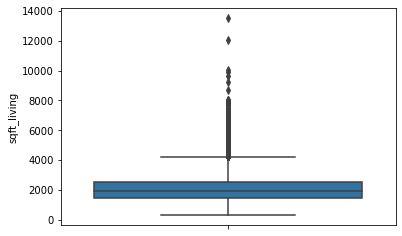

In [18]:
univariate_num(data=df, x="sqft_living")

* positive skewed 
* outliers upper side

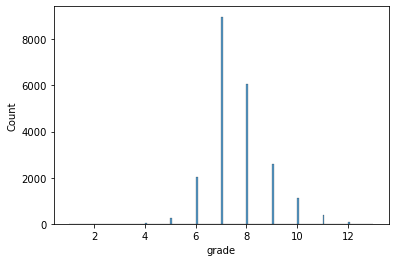

{'missing': 0,
 'min': 1,
 'max': 13,
 'mean': 7.66,
 'var': 1.38,
 'std': 1.18,
 'range': 12,
 'q1': 7.0,
 'q2': 7.0,
 'q3': 8.0,
 'skewness': 0.77,
 'kurtosis': 1.19}

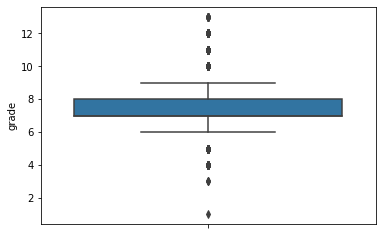

In [19]:
univariate_num(data=df, x="grade")

#### Bivariate Analysis
* cat-cat
* cat-num/num-cat
* num-num

In [20]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_yr
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,67
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,71
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,89
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,57
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,13
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,8
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,13
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,18


* Price does not even depend on id so we can drop 

  and also lat , long , zipcode not depend on price
  
* we uses house_yr old so we can drop yr_built

In [21]:
df.drop(columns=["lat", "long", "zipcode", "id"], inplace=True)

In [22]:
df.drop(columns=["yr_built"], inplace=True)

In [23]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,house_yr
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,67
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,1690,7639,71
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,2720,8062,89
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,1360,5000,57
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,1800,7503,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,0,1530,1509,13
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,0,1830,7200,8
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,0,1020,2007,13
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,0,1410,1287,18


<AxesSubplot:xlabel='grade', ylabel='price'>

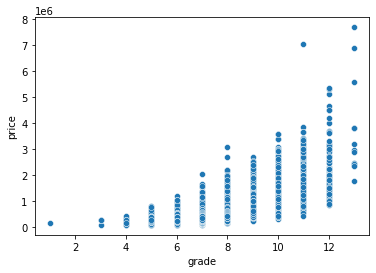

In [24]:
sns.scatterplot(data=df, x=df["grade"], y=df["price"])

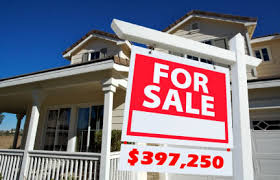

* We see when grade increase price also increase 


<AxesSubplot:xlabel='house_yr', ylabel='price'>

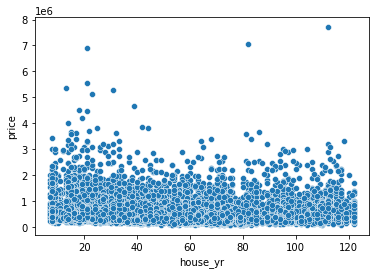

In [25]:
sns.scatterplot(data=df, x=df["house_yr"], y=df["price"])

* we see new house price is high 

<AxesSubplot:xlabel='condition', ylabel='price'>

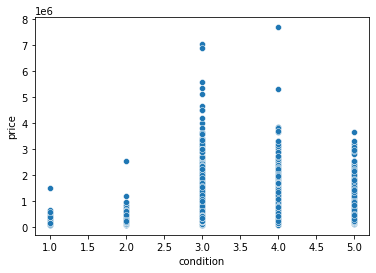

In [26]:
sns.scatterplot(data=df, x=df["condition"], y=df["price"])

## Outliers treatment

In [27]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
price,21613.0,540088.141767,367127.196483,75000.0,153500.36,175000.00,191342.00,202344.00,210000.0,321950.00,450000.00,645000.0,887000.0,1156480.0,1259040.00,1388000.00,1600000.00,1964400.00,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,2.00,2.00,2.00,2.00,2.0,3.00,3.00,4.0,4.0,5.0,5.00,5.00,5.00,6.00,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.00,1.00,1.00,1.00,1.0,1.75,2.25,2.5,3.0,3.5,3.50,3.50,3.75,4.25,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,720.00,790.00,840.00,900.00,940.0,1427.00,1910.00,2550.0,3250.0,3760.0,3920.00,4140.00,4410.00,4978.80,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,1013.12,1184.00,1305.36,1489.48,1800.0,5040.00,7618.00,10688.0,21397.6,43339.2,50658.16,67436.84,107157.00,213008.00,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.00,1.00,1.00,1.0,1.00,1.50,2.0,2.0,2.0,2.00,2.50,3.00,3.00,3.5
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.0
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,2.0,2.00,3.00,3.00,4.00,4.0
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,3.00,3.00,3.0,3.00,3.00,4.0,4.0,5.0,5.00,5.00,5.00,5.00,5.0
grade,21613.0,7.656873,1.175459,1.0,5.00,6.00,6.00,6.00,6.0,7.00,7.00,8.0,9.0,10.0,10.00,10.00,11.00,11.00,13.0


In [28]:
df_out=["bedrooms", "bathrooms", "price", "sqft_living", "sqft_lot", "grade", "sqft_above", 
"sqft_basement",  "sqft_lot15", "sqft_living15"]

In [29]:
df_not_out=df.drop(columns=["bedrooms", "bathrooms", "price", "sqft_living", "sqft_lot", "grade", "sqft_above", 
"sqft_basement",  "sqft_lot15", "sqft_living15"])

### Treating outliers

In [30]:
df1_out=df[df_out]

In [31]:
df1_out

,bedrooms,bathrooms,price,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,sqft_lot15,sqft_living15
0,3,1.00,221900.0,1180,5650,7,1180,0,5650,1340
1,3,2.25,538000.0,2570,7242,7,2170,400,7639,1690
2,2,1.00,180000.0,770,10000,6,770,0,8062,2720
3,4,3.00,604000.0,1960,5000,7,1050,910,5000,1360
4,3,2.00,510000.0,1680,8080,8,1680,0,7503,1800
...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,360000.0,1530,1131,8,1530,0,1509,1530
21609,4,2.50,400000.0,2310,5813,8,2310,0,7200,1830
21610,2,0.75,402101.0,1020,1350,7,1020,0,2007,1020
21611,3,2.50,400000.0,1600,2388,8,1600,0,1287,1410


### For outliers treatment we use capping method
----------------------------------------------------------------------_

In [32]:
### Outlier Capping Function - Method -1
def outliers_percentile(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x

In [33]:
df2=df1_out.apply(outliers_percentile)

Now we have treated outliers we can combine with non outliers variable

In [34]:
df3=pd.concat([df2, df_not_out], axis=1)

In [35]:
df3

,bedrooms,bathrooms,price,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,sqft_lot15,sqft_living15,floors,waterfront,view,condition,yr_renovated,house_yr
0,3.0,1.00,221900.0,1180.0,5650.0,7.0,1180.0,0.0,5650.0,1340.0,1.0,0,0,3,0,67
1,3.0,2.25,538000.0,2570.0,7242.0,7.0,2170.0,400.0,7639.0,1690.0,2.0,0,0,3,1991,71
2,2.0,1.00,180000.0,770.0,10000.0,6.0,770.0,0.0,8062.0,2720.0,1.0,0,0,3,0,89
3,4.0,3.00,604000.0,1960.0,5000.0,7.0,1050.0,910.0,5000.0,1360.0,1.0,0,0,5,0,57
4,3.0,2.00,510000.0,1680.0,8080.0,8.0,1680.0,0.0,7503.0,1800.0,1.0,0,0,3,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,2.50,360000.0,1530.0,1131.0,8.0,1530.0,0.0,1509.0,1530.0,3.0,0,0,3,0,13
21609,4.0,2.50,400000.0,2310.0,5813.0,8.0,2310.0,0.0,7200.0,1830.0,2.0,0,0,3,0,8
21610,2.0,1.00,402101.0,1020.0,1350.0,7.0,1020.0,0.0,2007.0,1020.0,2.0,0,0,3,0,13
21611,3.0,2.50,400000.0,1600.0,2388.0,8.0,1600.0,0.0,1287.0,1410.0,2.0,0,0,3,0,18


In [36]:
df3.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
bedrooms,21613.0,3.375422,0.866261,2.00,2.0000,2.00,2.00,2.00,2.0,3.00,3.00,4.0,4.0,5.0,5.00,5.00,5.00,6.000,6.00
bathrooms,21613.0,2.110501,0.746825,1.00,1.0000,1.00,1.00,1.00,1.0,1.75,2.25,2.5,3.0,3.5,3.50,3.50,3.75,4.250,4.25
price,21613.0,532888.126735,317438.089268,153500.36,153500.6768,175000.00,191342.00,202344.00,210000.0,321950.00,450000.00,645000.0,887000.0,1156480.0,1259040.00,1388000.00,1600000.00,1963872.000,1964400.00
sqft_living,21613.0,2070.894721,872.755768,720.00,720.0000,790.00,840.00,900.00,940.0,1427.00,1910.00,2550.0,3250.0,3760.0,3920.00,4140.00,4410.00,4977.744,4978.80
sqft_lot,21613.0,13985.009996,27703.147345,1013.12,1013.2256,1184.00,1305.36,1489.48,1800.0,5040.00,7618.00,10688.0,21397.6,43339.2,50658.16,67436.84,107157.00,213008.000,213008.00
grade,21613.0,7.653311,1.151958,5.00,5.0000,6.00,6.00,6.00,6.0,7.00,7.00,8.0,9.0,10.0,10.00,10.00,11.00,11.000,11.00
sqft_above,21613.0,1781.797529,795.135471,700.00,700.0000,750.00,790.00,820.00,850.0,1190.00,1560.00,2210.0,2950.0,3400.0,3520.00,3700.00,3970.00,4370.000,4370.00
sqft_basement,21613.0,288.171008,429.005284,0.00,0.0000,0.00,0.00,0.00,0.0,0.00,0.00,560.0,970.0,1190.0,1250.00,1340.00,1450.00,1660.000,1660.00
sqft_lot15,21613.0,12004.317822,19872.532922,1191.24,1191.4512,1296.24,1426.36,1670.96,1999.2,5100.00,7620.00,10083.0,17852.4,37062.8,42654.44,51400.00,80188.28,157687.000,157687.00
sqft_living15,21613.0,1982.897238,666.839300,950.00,950.0000,1020.00,1060.00,1100.00,1140.0,1490.00,1840.00,2360.0,2930.0,3300.0,3420.00,3560.00,3767.60,4080.000,4080.00


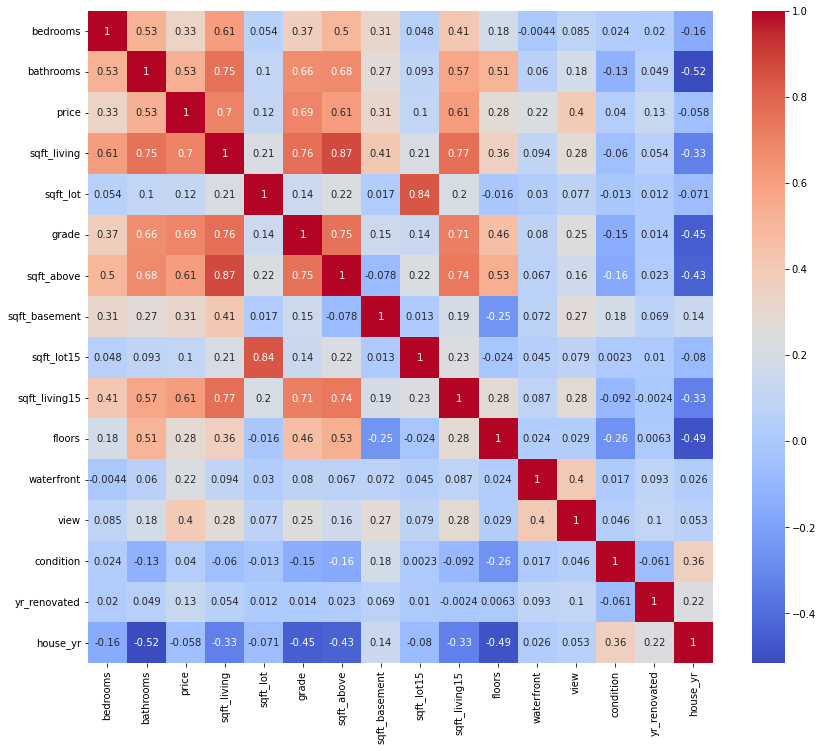

In [37]:
cr=df3.corr()
cr
plt.figure(figsize=(14,12))
sns.heatmap(cr, annot=True, cmap="coolwarm")
plt.show()

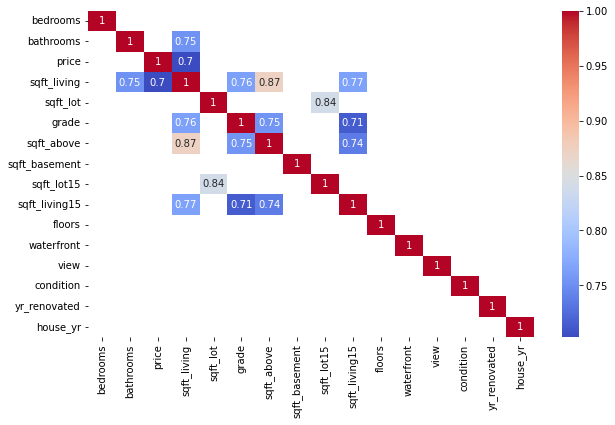

In [38]:
cr1=cr[abs(cr)>.7]

plt.figure(figsize=(10,6))
sns.heatmap(cr1, annot=True, cmap="coolwarm")
plt.show()                                                #annot = show numbers in graaph

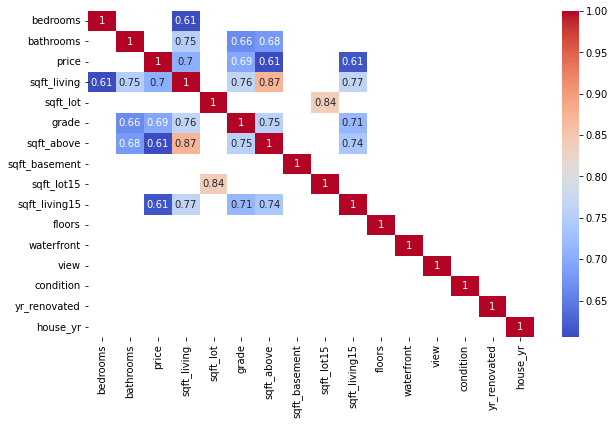

In [40]:
cr2=cr[abs(cr)>.6]

plt.figure(figsize=(10,6))
sns.heatmap(cr2, annot=True, cmap="coolwarm")
plt.show()                                                #annot = show numbers in graaph

In [41]:
df3.head()

,bedrooms,bathrooms,price,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,sqft_lot15,sqft_living15,floors,waterfront,view,condition,yr_renovated,house_yr
0,3.0,1.00,221900.0,1180.0,5650.0,7.0,1180.0,0.0,5650.0,1340.0,1.0,0,0,3,0,67
1,3.0,2.25,538000.0,2570.0,7242.0,7.0,2170.0,400.0,7639.0,1690.0,2.0,0,0,3,1991,71
2,2.0,1.00,180000.0,770.0,10000.0,6.0,770.0,0.0,8062.0,2720.0,1.0,0,0,3,0,89
3,4.0,3.00,604000.0,1960.0,5000.0,7.0,1050.0,910.0,5000.0,1360.0,1.0,0,0,5,0,57
4,3.0,2.00,510000.0,1680.0,8080.0,8.0,1680.0,0.0,7503.0,1800.0,1.0,0,0,3,0,35


In [42]:
df3.columns

Index(['bedrooms', 'bathrooms', 'price', 'sqft_living', 'sqft_lot', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15', 'floors',
       'waterfront', 'view', 'condition', 'yr_renovated', 'house_yr'],
      dtype='object')

In [43]:
df3

,bedrooms,bathrooms,price,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,sqft_lot15,sqft_living15,floors,waterfront,view,condition,yr_renovated,house_yr
0,3.0,1.00,221900.0,1180.0,5650.0,7.0,1180.0,0.0,5650.0,1340.0,1.0,0,0,3,0,67
1,3.0,2.25,538000.0,2570.0,7242.0,7.0,2170.0,400.0,7639.0,1690.0,2.0,0,0,3,1991,71
2,2.0,1.00,180000.0,770.0,10000.0,6.0,770.0,0.0,8062.0,2720.0,1.0,0,0,3,0,89
3,4.0,3.00,604000.0,1960.0,5000.0,7.0,1050.0,910.0,5000.0,1360.0,1.0,0,0,5,0,57
4,3.0,2.00,510000.0,1680.0,8080.0,8.0,1680.0,0.0,7503.0,1800.0,1.0,0,0,3,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,2.50,360000.0,1530.0,1131.0,8.0,1530.0,0.0,1509.0,1530.0,3.0,0,0,3,0,13
21609,4.0,2.50,400000.0,2310.0,5813.0,8.0,2310.0,0.0,7200.0,1830.0,2.0,0,0,3,0,8
21610,2.0,1.00,402101.0,1020.0,1350.0,7.0,1020.0,0.0,2007.0,1020.0,2.0,0,0,3,0,13
21611,3.0,2.50,400000.0,1600.0,2388.0,8.0,1600.0,0.0,1287.0,1410.0,2.0,0,0,3,0,18


model devolpment

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x=df3[['bedrooms', 'bathrooms', 'price', 'sqft_lot', 'grade', 'sqft_basement',
       'sqft_lot15', 'sqft_living15', 'floors', 'waterfront', 'view',
       'condition', 'yr_renovated', 'house_yr']]
y=df3['price']

In [46]:
x_train, x_test, y_train, y_test=train_test_split(x, y , test_size=.25, random_state=0)

### Now we will standardise the data

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
st=StandardScaler()

In [50]:
x_train_st=st.fit_transform(x_train)

In [51]:
x_test_st=st.transform(x_test)

here we will use random forest regressor becouse target variable is continous

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 9, 10, 11,12,13],
    'max_features': [2, 3],
    'min_samples_leaf': [300, 400, 500],
    'min_samples_split': [800, 1000, 1112],
    'n_estimators': [100, 120, 150,]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [54]:
grid_search

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [8, 9, 10, 11, 12, 13],
                         'max_features': [2, 3],
                         'min_samples_leaf': [300, 400, 500],
                         'min_samples_split': [800, 1000, 1112],
                         'n_estimators': [100, 120, 150]},
             verbose=2)

In [ ]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [59]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=12, max_features=3, min_samples_leaf=300,
                      min_samples_split=800, n_estimators=150)

In [60]:
rf1=RandomForestRegressor(max_depth=12, max_features=3, min_samples_leaf=300,
                      min_samples_split=800, n_estimators=150)

In [61]:
rf1.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, max_features=3, min_samples_leaf=300,
                      min_samples_split=800, n_estimators=150)

In [62]:
rf1.score(x_train,y_train)

0.815725762064176

In [63]:
rf1.score(x_test,y_test)

0.817272828983443

In [64]:
from sklearn import metrics

In [69]:
metrics.mean_absolute_error(rf1.predict(x_train),y_train)

78022.91253726915

In [70]:
metrics.mean_absolute_error(rf1.predict(x_test),y_test)

77138.71819414163